In [1]:
import numpy as np
import matplotlib.pyplot as plt # data visualization library

If possible, update your sklearn version to 1.3.2 to reduce variance in the versions.

In [2]:
#!pip3 install scikit-learn==1.3.2

In [3]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.3.2.


# PCA Faces

In [4]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   =====================
    Classes    

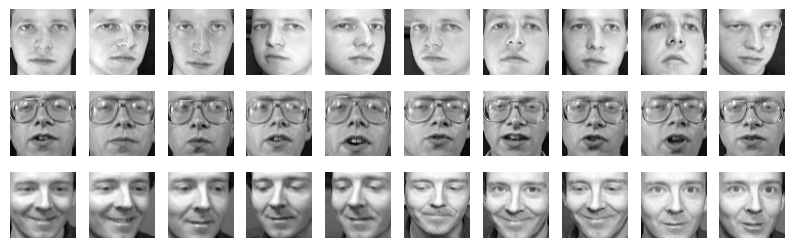

In [5]:
# This is how you plot the first thirty pictures of the dataset
fig = plt.figure(figsize=(10, 3))
for i in range(30):
    ax = plt.subplot2grid((3, 10), (int(i/10), i-int(i/10)*10))
    
    ax.imshow(faces.data[i].reshape(64, 64), cmap=plt.cm.gray)
    ax.axis('off')

In [6]:
D = faces.data
D.shape

(400, 4096)

### Necessary import(s):

In [7]:
from sklearn.decomposition import PCA

## 1a

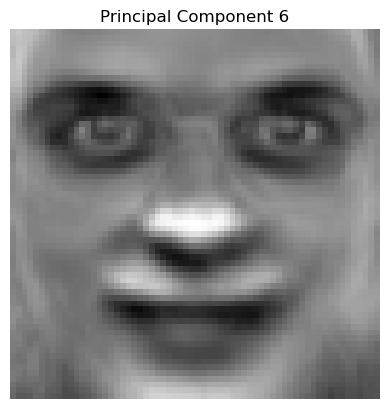

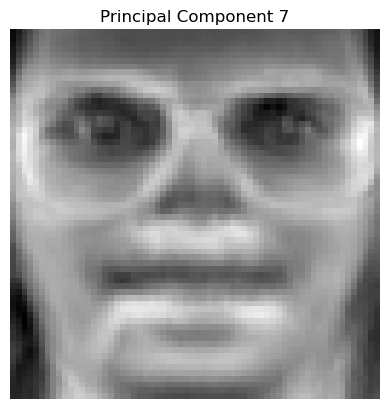

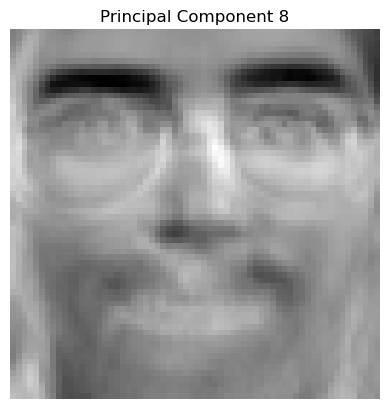

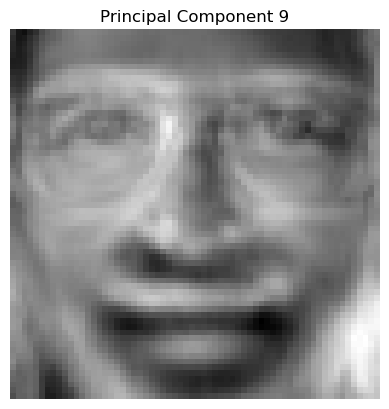

In [28]:
# get height and width of images
h, w = faces.images[0].shape

pca = PCA()
# generate learning params and fit data
D_transformed = pca.fit_transform(D)

# mind the difference between PC value and array index
for index in range(6,10):
    # reshape back from flattened 1D to 2D
    principal_component = pca.components_[index-1].reshape((h,w))

    plt.figure()
    plt.imshow(principal_component, cmap=plt.cm.gray)
    plt.axis('off')
    plt.title(f'Principal Component {index}')
    plt.show()


## 1b

In [9]:
# dimension 3
pca = PCA(3)

# 5th datapoint, index 4
pca.fit_transform(D)[4]

array([-3.9620085, -3.29387  ,  3.6528764], dtype=float32)

## 1c

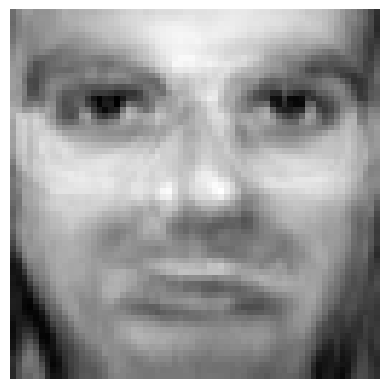

In [32]:
# dimension 50
pca = PCA(50)
# "train"
something = pca.fit(D)

# generate image`
lowDimRep = [0.5 for i in range(0,25)] + [-0.5 for i in range(0,25)]
reconstructed_image = (pca.inverse_transform(lowDimRep)).reshape(h,w)

# plot
plt.figure()
plt.imshow(reconstructed_image, cmap=plt.cm.gray)
plt.axis('off')
plt.show()